In [35]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [36]:
# Example CSV file
data = pd.read_csv("Churn_Modelling.csv")
print("Dataset Loaded Successfully")
print(data.head())



Dataset Loaded Successfully
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         9382

In [37]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)



In [38]:

le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])
data['Geography'] = le.fit_transform(data['Geography'])

In [39]:

X = data.drop('Exited', axis=1)   # Features
y = data['Exited']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [41]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [42]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


--- Logistic Regression ---
Accuracy: 0.8155
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



In [43]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


--- Random Forest ---
Accuracy: 0.8645
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [44]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

print("\n--- Gradient Boosting ---")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))




--- Gradient Boosting ---
Accuracy: 0.866
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [45]:
import pandas as pd

cm = confusion_matrix(y_test, gb_pred)

cm_df = pd.DataFrame(
    cm,
    index=["Actual No Churn", "Actual Churn"],
    columns=["Predicted No Churn", "Predicted Churn"]
)

print(cm_df)



                 Predicted No Churn  Predicted Churn
Actual No Churn                1547               60
Actual Churn                    208              185


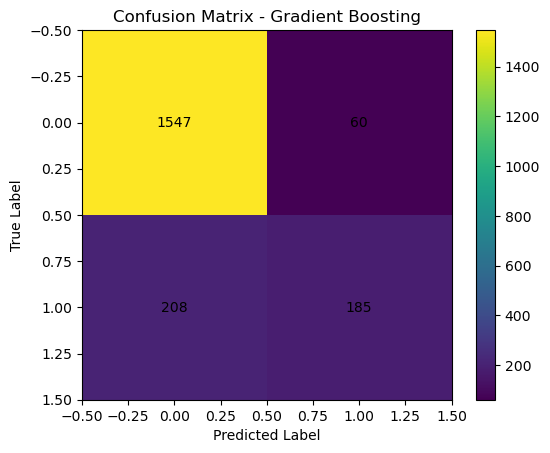

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, gb_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()

for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


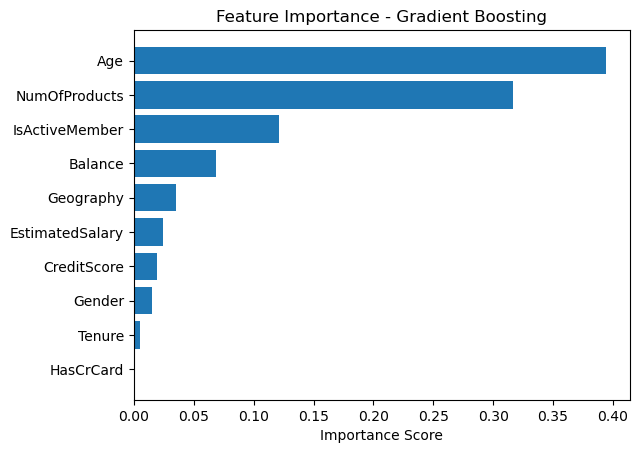

In [47]:
import numpy as np

feature_importance = gb.feature_importances_
features = X.columns

indices = np.argsort(feature_importance)

plt.figure()
plt.barh(range(len(indices)), feature_importance[indices])
plt.yticks(range(len(indices)), features[indices])
plt.xlabel("Importance Score")
plt.title("Feature Importance - Gradient Boosting")
plt.show()
